In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Prepare data

In [2]:
data = pd.read_csv('mnist.csv', header = None)

In [3]:
data = data[:500]
data

In [5]:
label = data.iloc[:,[0]].copy().values

In [6]:
X = data.drop(columns = 0).copy().values
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Creating Gram matrix 

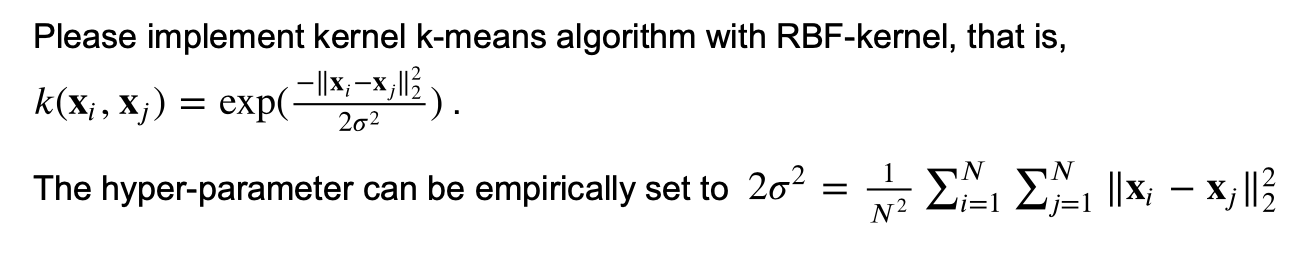

In [28]:
N = len(X)
Gram = np.zeros((N,N))

sigmaSquared = 0
for i in range(N):
    for j in range(N):
        sigmaSquared += np.linalg.norm(X[i] - X[j])**2

sigmaSquared /= N**2

for i in range(N):
    for j in range(N):
        Gram[i][j] = np.exp(-np.linalg.norm(X[i] - X[j])**2/sigmaSquared)

In [29]:
Gram

array([[1.        , 0.42356793, 0.31368959, ..., 0.35607876, 0.44157821,
        0.415671  ],
       [0.42356793, 1.        , 0.2817014 , ..., 0.34320126, 0.34275148,
        0.37696311],
       [0.31368959, 0.2817014 , 1.        , ..., 0.40774871, 0.44471621,
        0.29878051],
       ...,
       [0.35607876, 0.34320126, 0.40774871, ..., 1.        , 0.43982207,
        0.40343488],
       [0.44157821, 0.34275148, 0.44471621, ..., 0.43982207, 1.        ,
        0.48823275],
       [0.415671  , 0.37696311, 0.29878051, ..., 0.40343488, 0.48823275,
        1.        ]])

In [33]:
Gram.shape

(500, 500)

# Kernel K-means

In [34]:
# initialise r

k = 5

np.random.seed(69) 
r = np.zeros((N, k))
print(r)
for i in range(N):
    initial_assignment = np.random.randint(low = 0, high = k)
    r[i, initial_assignment] = 1

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [31]:
max_iter = 100

for niter in range(max_iter):
    r_new = []
    for i in range(N):
        
        distance_ls = []
        
        for each_k in range(k):
            
            # calculate r_prime 
            r_prime_k = np.zeros((N,1))
            total_assigned_to_k = np.sum(r[:,each_k])
            
            for j in range(N):
                r_prime_k[j] = r[j,each_k]/total_assigned_to_k
                
            # calculate distance from data point i to the centre of cluster k
            
            distance = K[i,i] - 2*r_prime_k.T@Gram[i,:] + r_prime_k.T@Gram@r_prime_k
            distance_ls.append(np.squeeze(distance))

        # set r_i    
        distance_ls = np.array(distance_ls)
        new_assignment_for_i = (distance_ls == np.min(distance_ls))

        r_new.append(new_assignment_for_i)
        
    r_new = np.array(r_new)
    
    # checking if the assignment has changed from the last iteration
    print('iteration', niter, np.allclose(r, r_new))
    if np.allclose(r, r_new): # if assignment hasn't changed, then stop
        print('done')
        break
        
    # set the new assignment to current assignment
    r = r_new

iteration 0 False
iteration 1 False
iteration 2 False
iteration 3 False
iteration 4 False
iteration 5 False
iteration 6 False
iteration 7 False
iteration 8 False
iteration 9 True
done


In [14]:
def collapse_labels(M):
    labels = []
    for row in M:
        for i in range(len(row)):
            if row[i] == 1:
                labels.append(i)
                break
    return np.array(labels)

In [32]:
l = collapse_labels(r_new)
l

array([3, 0, 2, 4, 2, 4, 1, 3, 1, 2, 3, 1, 3, 2, 1, 1, 2, 4, 2, 1, 2, 0,
       1, 4, 1, 3, 2, 3, 3, 1, 3, 4, 2, 1, 0, 1, 2, 0, 2, 2, 1, 4, 1, 1,
       3, 2, 4, 1, 3, 3, 3, 0, 2, 1, 2, 4, 0, 1, 2, 4, 2, 4, 2, 0, 2, 1,
       2, 1, 3, 0, 1, 1, 1, 2, 3, 0, 3, 4, 4, 1, 3, 0, 3, 2, 2, 4, 3, 2,
       0, 2, 2, 1, 2, 2, 4, 0, 1, 4, 3, 1, 2, 2, 1, 1, 1, 4, 2, 3, 0, 2,
       2, 3, 1, 4, 0, 2, 2, 3, 0, 0, 3, 0, 4, 1, 1, 4, 2, 2, 1, 4, 3, 2,
       1, 1, 3, 3, 3, 4, 3, 2, 1, 1, 2, 4, 3, 1, 4, 2, 2, 3, 2, 2, 1, 1,
       2, 2, 0, 3, 2, 4, 1, 3, 2, 2, 2, 2, 2, 2, 1, 0, 2, 4, 2, 1, 1, 1,
       2, 4, 2, 3, 1, 3, 3, 2, 1, 1, 2, 4, 2, 4, 4, 1, 0, 1, 2, 1, 2, 4,
       3, 4, 1, 4, 4, 3, 2, 4, 0, 3, 1, 0, 3, 1, 1, 4, 2, 3, 3, 2, 2, 3,
       4, 2, 2, 1, 1, 4, 2, 1, 2, 0, 1, 1, 2, 4, 0, 3, 1, 2, 2, 1, 1, 2,
       3, 1, 3, 4, 3, 1, 1, 0, 2, 1, 4, 4, 3, 3, 4, 2, 1, 1, 1, 2, 1, 1,
       2, 4, 3, 1, 1, 1, 1, 2, 2, 1, 4, 2, 1, 4, 3, 3, 2, 3, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 3, 2, 0, 2, 4, 0, 2, 3, 2, 4,

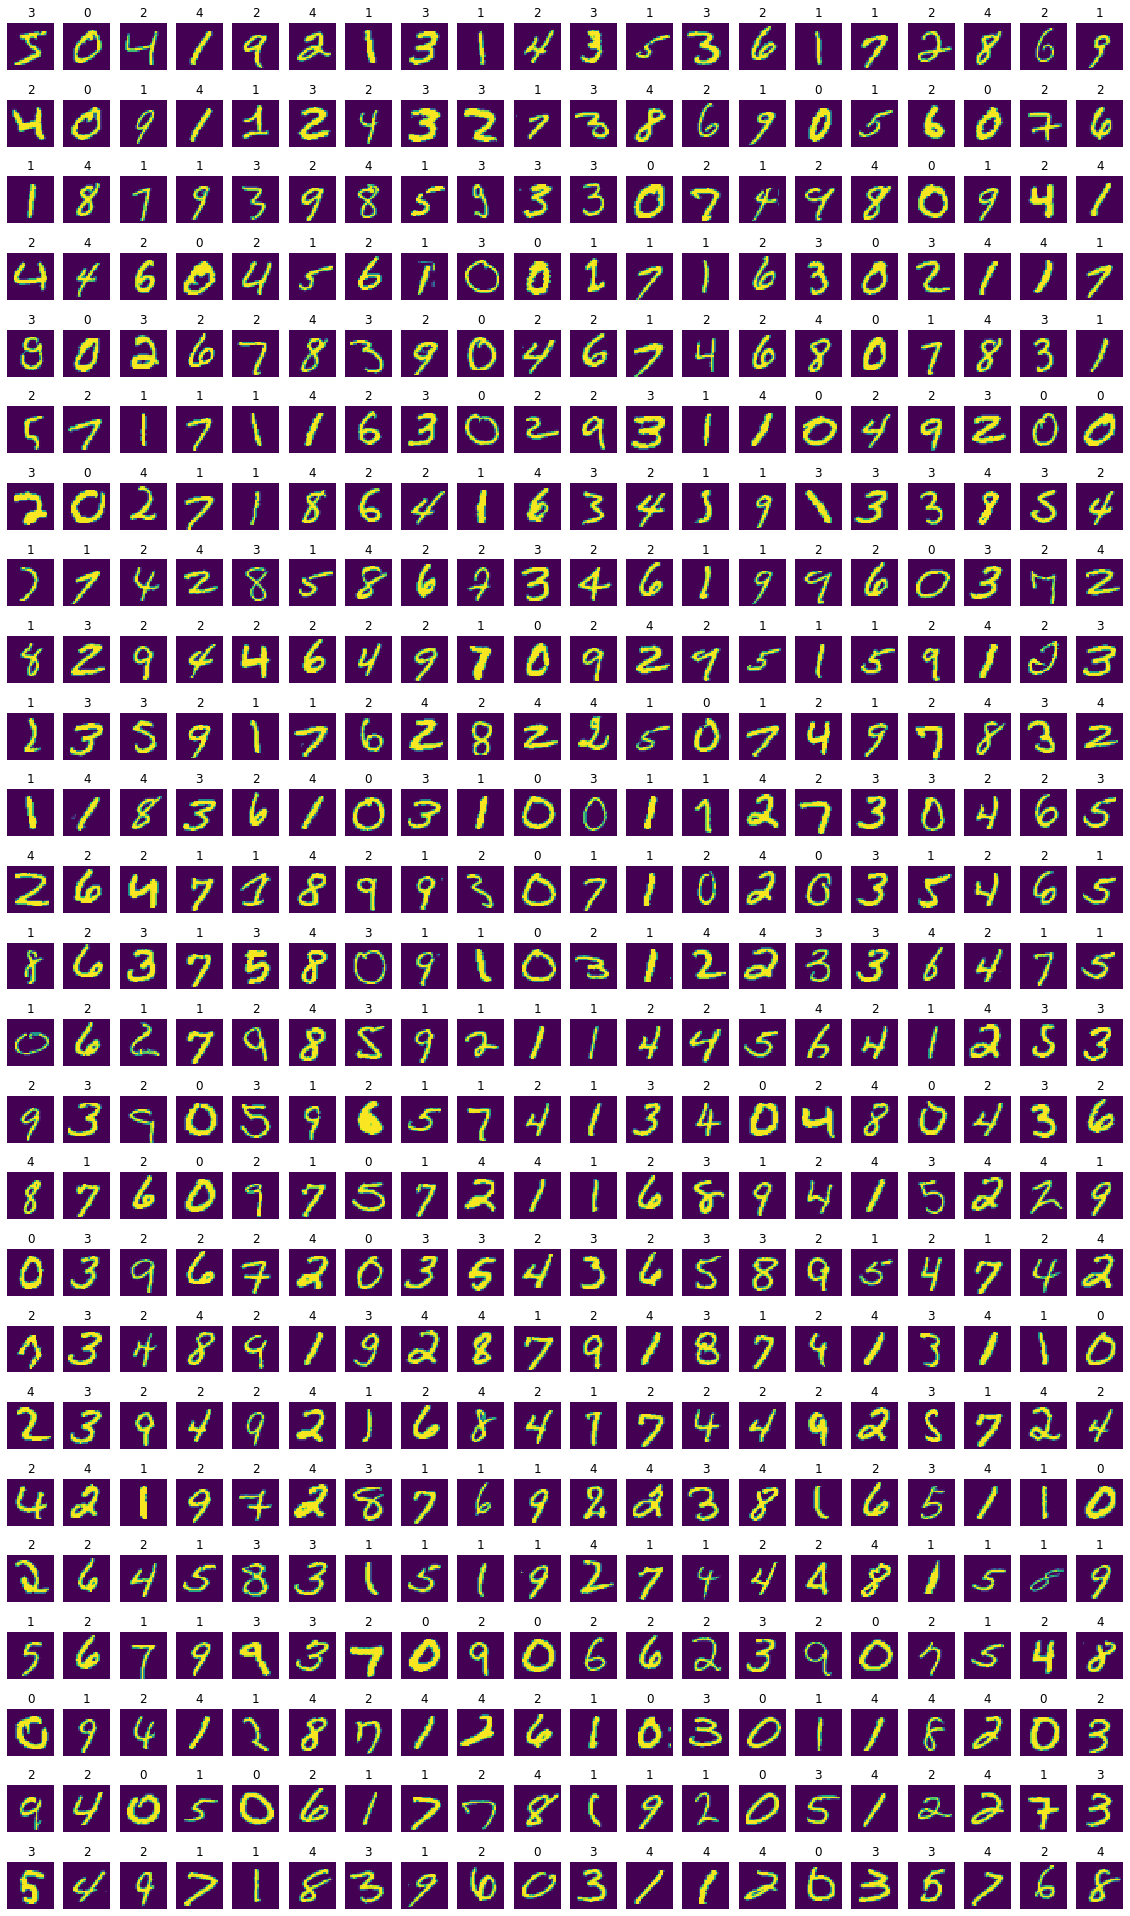

In [27]:
fig, axs = plt.subplots(25, 20, figsize = (20, 35))
num=0
for m in range(25):
    for n in range(20):
        axs[m,n].imshow(X[num].reshape(28,28))
        axs[m,n].set_title('{}'.format(l[num]))
        axs[m,n].axis('off')
        num += 1
        
plt.show()